# Clustering Analysis – Enhanced Submission

This notebook addresses feedback by adding deeper EDA, parameter experimentation, detailed cluster interpretation, and DBSCAN silhouette score.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:

df = pd.read_excel('/content/EastWestAirlines.xlsx')
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Exploratory Data Analysis

In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


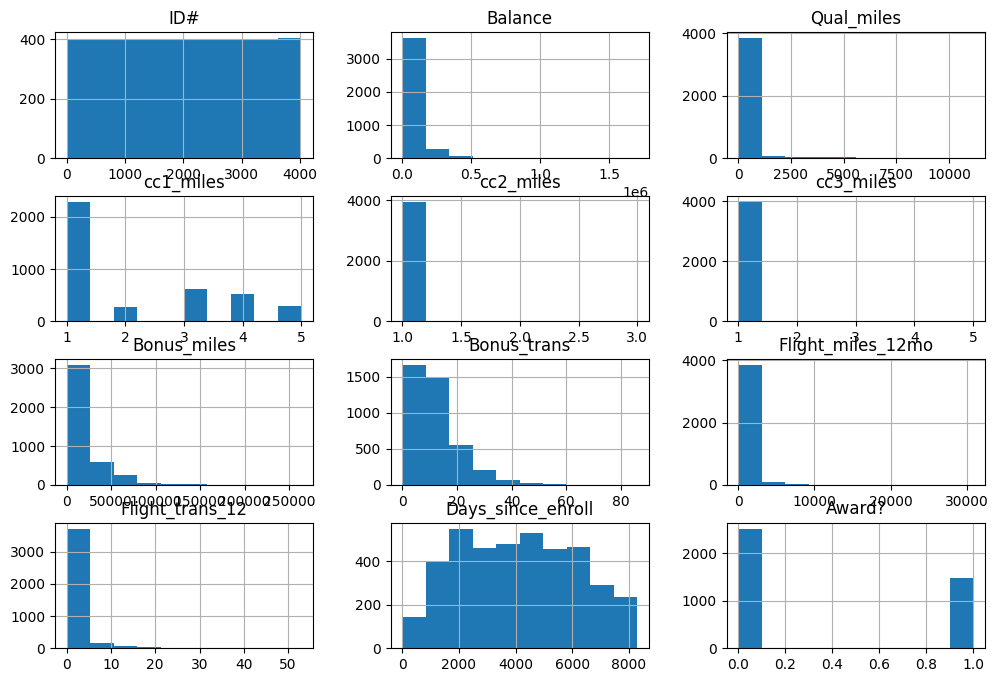

In [4]:

df.hist(figsize=(12,8))
plt.show()


## Data Preprocessing

In [5]:

df_clean = df.drop(columns=['ID#']) if 'ID#' in df.columns else df
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)


## PCA for Visualization

In [6]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


## K-Means Clustering

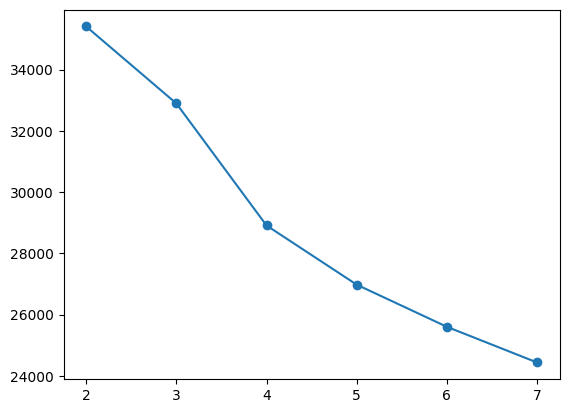

In [7]:

inertia = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.show()


Silhouette Score (K-Means): 0.2674062376813128


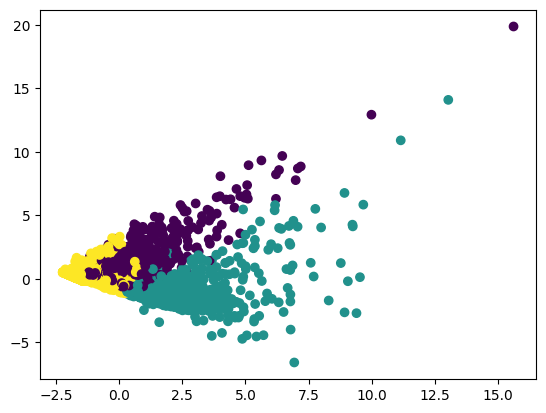

In [8]:

kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(scaled_data)
print("Silhouette Score (K-Means):", silhouette_score(scaled_data, labels_km))

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_km)
plt.show()


## Hierarchical Clustering – Linkage Comparison

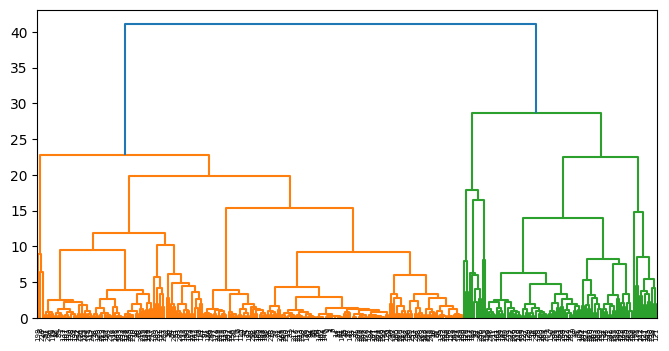

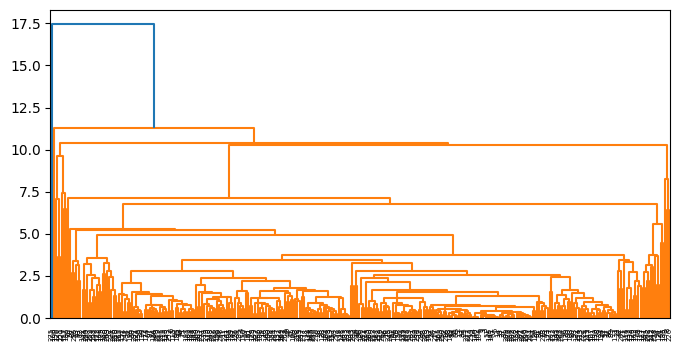

In [9]:

linked_ward = linkage(scaled_data[:300], method='ward')
plt.figure(figsize=(8,4))
dendrogram(linked_ward)
plt.show()

linked_avg = linkage(scaled_data[:300], method='average')
plt.figure(figsize=(8,4))
dendrogram(linked_avg)
plt.show()


## DBSCAN – Parameter Experimentation

In [10]:

for eps in [1.2, 1.5, 1.8]:
    db = DBSCAN(eps=eps, min_samples=10)
    labels = db.fit_predict(scaled_data)
    clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps}, clusters={clusters}")


eps=1.2, clusters=3
eps=1.5, clusters=3
eps=1.8, clusters=3


Silhouette Score (DBSCAN): 0.29050762433580474


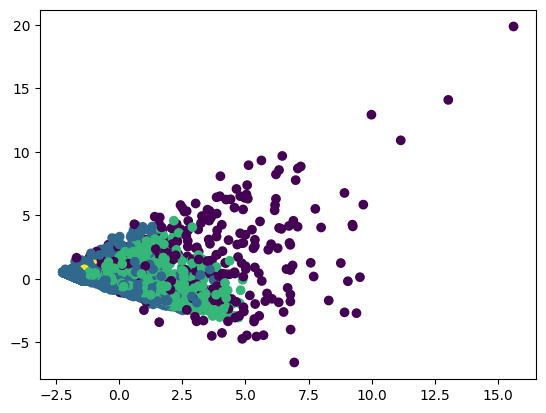

In [11]:

dbscan = DBSCAN(eps=1.8, min_samples=10)
labels_db = dbscan.fit_predict(scaled_data)

mask = labels_db != -1
if len(set(labels_db[mask])) > 1:
    print("Silhouette Score (DBSCAN):",
          silhouette_score(scaled_data[mask], labels_db[mask]))
else:
    print("Silhouette Score (DBSCAN): Not defined")

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_db)
plt.show()


## Conclusion
K-Means is most interpretable, Hierarchical confirms structure, DBSCAN detects noise.